In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

STATUS

In [2]:
df = pd.read_csv('../output/datastatus.csv', parse_dates=['timestamp'])

In [3]:
usernamelist = df["username"].unique()
usernamelist = list(usernamelist)
usernamelist.remove("test-bot-1")
usernamelist.remove("test-bot-2")
usernamelist.remove("Groovy")

In [4]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [5]:
df.loc[df["status"] == "online", "status-code"] = 1
df.loc[df["status"] == "offline", "status-code"] = 0
df.loc[df["status"] == "idle", "status-code"] = 0
df.loc[df["status"] == "dnd", "status-code"] = 0

In [6]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [7]:
times = np.zeros((7, 24))

In [8]:
i = 0
for idx, row in df.iterrows():
    times[row["day"], row["hour"]] += row["status-code"] 
    i += 1
times = times/i

In [9]:
status = np.empty((7, 1440, len(usernamelist)), dtype=object)

In [10]:
dfonline = df.loc[df["status"].isin(["online", "dnd"])]

In [11]:
for idx, row in dfonline.iterrows():
    if row["username"] in usernamelist:
        status[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"])] = 1

<AxesSubplot:>

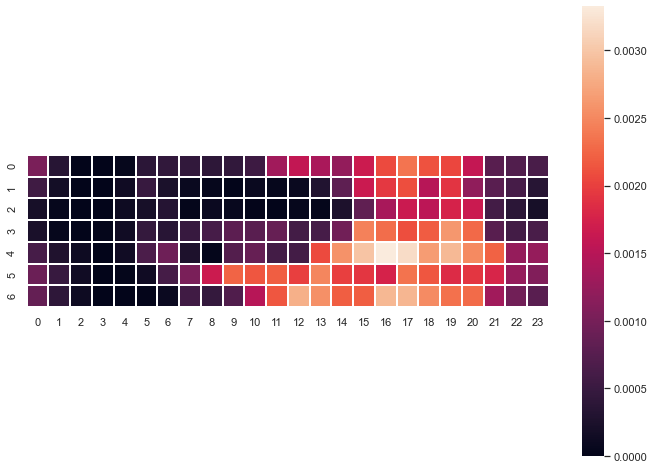

In [12]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

MESSAGES

In [13]:
df = pd.read_csv('../output/datacontent.csv', parse_dates=['timestamp'])

In [14]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [15]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [16]:
times = np.zeros((7, 24))

In [17]:
i = 0
for idx, row in df.iterrows():
    times[row["day"], row["hour"]] += row["length"]
    i += 1
times = times/i

In [18]:
messages = np.empty((7, 1440, len(usernamelist)), dtype=object)
messages.fill([])

In [19]:
for idx, row in df.iterrows():
    messages[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"][:len(row["username"])-5])] = 1

<AxesSubplot:>

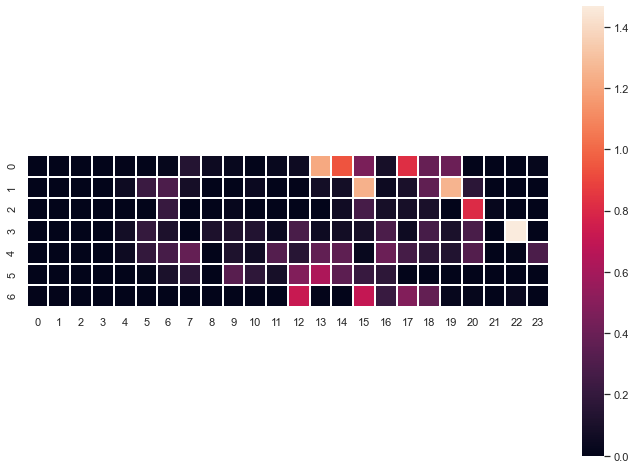

In [20]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

VOICE

In [21]:
df = pd.read_csv('../output/dataevent.csv', parse_dates=['timestamp'])

In [22]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [23]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [24]:
times = np.zeros((7, 24))

In [25]:
i = 0
for idx, row in df.iterrows():
    if row["event"] == "join":
        times[row["day"], row["hour"]] += 1
        i += 1
times = times/i

In [26]:
voice = np.empty((7, 1440, len(usernamelist)), dtype=object)
voice.fill([])

In [27]:
for idx, row in df.iterrows():
    if row["event"] == "join":
        voice[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"][:len(row["username"])-5])] = 1

<AxesSubplot:>

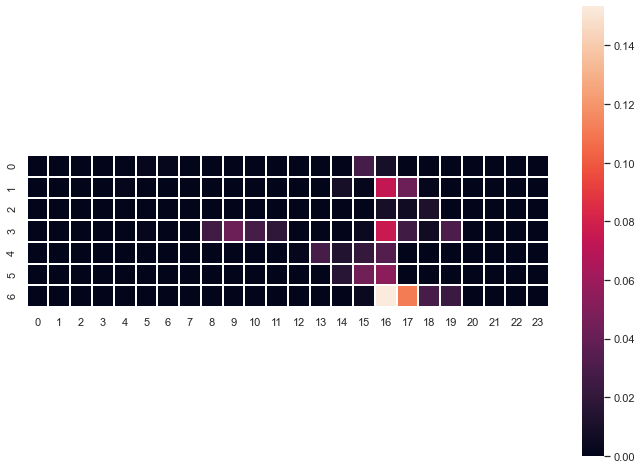

In [28]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

GAMES

In [29]:
df = pd.read_csv('../output/datagame.csv', parse_dates=['timestamp'])

In [30]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [31]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [32]:
times = np.zeros((7, 24))
i = 0
for idx, row in df.iterrows():
    times[row["day"], row["hour"]] += 1
    i += 1
times = times/i

In [33]:
games = np.empty((7, 1440, len(usernamelist)), dtype=object)
games.fill([])

In [34]:
for idx, row in df.iterrows():
    games[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"])] = 1

<AxesSubplot:>

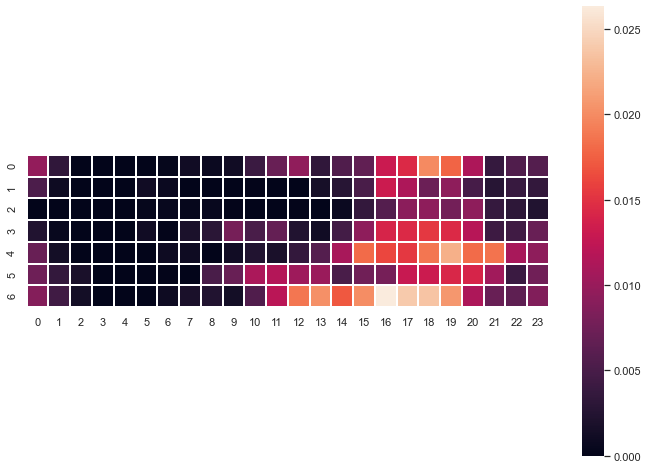

In [35]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

CREATING LINKS

In [36]:
from pyvis.network import Network
import itertools

In [37]:
df = pd.read_csv('../output/datastatus.csv', parse_dates=['timestamp'])

In [38]:
def make_inf_sequence(i):
    x = i
    while True:
        yield x

In [39]:
bonds = list(itertools.combinations(usernamelist, 2))
bonds = dict(zip(bonds, make_inf_sequence(0)))

In [41]:
for e in voice:
    for el in e:
        usernames = []
        for idx, u in enumerate(el):
            if u == 1:
                usernames.append(usernamelist[idx])
        for ele in list(itertools.combinations(usernames, 2)):
            if ele[0] != ele[1]:
                try:
                    bonds[(ele[0], ele[1])] += 1
                except:
                    bonds[(ele[1], ele[0])] += 1

In [42]:
for e in messages:
    for el in e:
        usernames = []
        for idx, u in enumerate(el):
            if u == 1:
                usernames.append(usernamelist[idx])
        for ele in list(itertools.combinations(usernames, 2)):
            if ele[0] != ele[1]:
                try:
                    bonds[(ele[0], ele[1])] += 1
                except:
                    bonds[(ele[1], ele[0])] += 1

In [44]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
net.barnes_hut()
for e in bonds:
    src = e[0]
    dst = e[1]
    w = bonds[e]

    net.add_node(src, src, title=" ", size=10)
    net.add_node(dst, dst, title=" ", size=10)
    net.add_edge(src, dst, value=w)

net.show('net.html')